<a href="https://colab.research.google.com/github/CurtCalledBurt/DS-Unit-1-Sprint-4-Linear-Algebra/blob/master/module4-clustering/Cell_Clustering_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Means Clustering

# 1) Use the "Breast Cancer Wisconsin (Diagnostic) Data Set" from Kaggle to try and cluster types of cancer cells. 

Here's the original dataset for your reference:

<https://www.kaggle.com/uciml/breast-cancer-wisconsin-data>

## This is a supervised learning dataset

(Because it has **labels** - The "diagnosis" column.)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA # You don't necessarily have to use this
from sklearn.cluster import KMeans # You don't necessarily have to use this
from sklearn.preprocessing import StandardScaler # You don't necessarily have to use this

true = pd.read_csv("https://raw.githubusercontent.com/ryanleeallred/datasets/master/Cancer_Cells.csv")
print(true.shape)
true.head()

(569, 33)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## Now it's an unsupervised learning dataset

(Because we've removed the diagnosis label) - Use this version.

In [2]:
diagnosis = {'M': 0, 'B': 1}
true['diagnosis'] = true['diagnosis'].replace(diagnosis)

df = true.copy()

df = df.drop('diagnosis', axis=1)
df = df.drop('Unnamed: 32', axis=1)
df.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Let's do it!

- You might want to do some data exploration to see if you can find specific columns that will help you find distinct clusters of cells
- You might want to use the elbow method to decide on the number of clusters to use.


In [0]:
df_array = df.to_numpy()

k_means_cluster = KMeans(n_clusters=2)
k_means_cluster.fit(df_array)
labels = k_means_cluster.labels_

#make this an array so we can do math with it later
labels = np.array(labels)

labels;

## Check you work: 

This is something that in a truly unsupervised learning situation **WOULD NOT BE POSSIBLE**. But for educational purposes go back and grab the true dianosis column (label) from the original dataset. Take your cluster labels and compare them to the original diagnosis column. You can make scatterplots for each to see how they compare or you can calculate a percent accuracy score like: 
\begin{align}
\frac{\text{Num Correct Labels}}{\text{Num Total Observations}}
\end{align}

In [4]:
differences = (true['diagnosis'] - labels).value_counts()

correct = differences[0]
false = differences[1] + differences[-1]

accuracy = correct/(false + correct)

print(differences,'\n')

print('Correct Labels: ', correct, '\n', 
      'Incorrect Labels: ', false, '\n')

print('Accuracy: ', accuracy)

 1    351
 0    213
-1      5
Name: diagnosis, dtype: int64 

Correct Labels:  213 
 Incorrect Labels:  356 

Accuracy:  0.37434094903339193


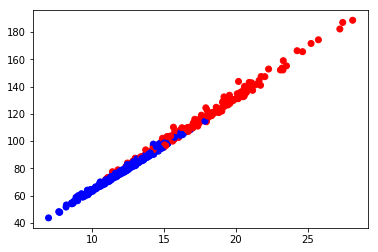

In [5]:
color_map = {0:'red', 1:'blue'}

label_color = [color_map[lab] for lab in true['diagnosis']]

plt.scatter(x=true['radius_mean'], y=true['perimeter_mean'], c=label_color)

plt.show()     

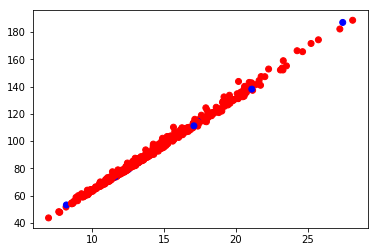

In [6]:
# Create scatterplot with coloring based on assigned labels
color_map = {0:'red', 1:'blue'}

label_color = [color_map[lab] for lab in labels]

plt.scatter(x=true['radius_mean'], y=true['perimeter_mean'], c=label_color)

plt.show()                  

# 2) Perform PCA on your dataset first and *then* use k-means clustering. 

- You need to standardize your data before PCA.
- First try clustering just on PC1 and PC2 so that you can make a scatterplot of your clustering.
- Then use use a scree plot to decide how many principal components to include in your clustering, and use however many principal components you need in order to retain 90% of the variation of the original dataset



In [0]:
def into_PCA(data, PA):
  from sklearn.decomposition import PCA
  from sklearn.preprocessing import StandardScaler
  
  
  #standardize the data!
  scaler = StandardScaler() #not really sure what a StandardScaler object is, but okay
  Z = scaler.fit_transform(data)


  #make a PCA callable object thing
  pca = PCA(PA)

  #and use the PCA object to execute it
  pca.fit(Z)

  # eigenvectors and eigenvalues, if you want to print them you can uncomment this
  # print ("Eigenvecters \n", pca.components_ )
  # print( "Eigenvalues \n", pca.explained_variance_ )

  # transform the data into an actual PCA transform
  B = pca.transform(Z)
  return (B)

In [0]:
def k_cluster (data, clusters):
  import pandas as pd
  import numpy as np
  from sklearn.cluster import KMeans
  
  #make the cluster using PCA with 2 principal axes

  k_means_cluster = KMeans(n_clusters=clusters)
  k_means_cluster.fit(data)
  labels = k_means_cluster.labels_

  #make this an array so we can do math with it later
  labels = np.array(labels)

  return(labels)

  # Most often this outputs a postive diagnosis, what should be a 1, as 0, 
  # and a negative diagnosis as positive. Occasionally it won't though.
  # very weird.

  # And i know that this is the case because increasing the number of 
  # principal components I use DECREASES my overall accuracy once I 
  # check for accuracy

In [0]:
C = into_PCA(df,2)
labelsPCA = k_cluster(C, 2)
labelsPCA;

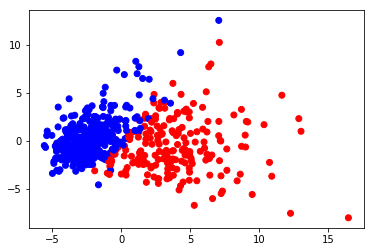

In [10]:
#plot the true values
X, Y = zip(*C)

color_map = {0:'red', 1:'blue'}

label_color = [color_map[lab] for lab in true['diagnosis']]

plt.scatter(x=X, y=Y, c=label_color)

plt.show() 

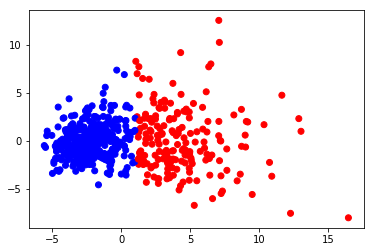

In [11]:
#plot the predicted values
X, Y = zip(*C)

color_map = {0:'red', 1:'blue'}

label_color = [color_map[lab] for lab in labelsPCA]

plt.scatter(x=X, y=Y, c=label_color)

plt.show() 

#depending on what happened in the cluster function,
#we'll see red where we should see blue and vice versa
#we address that when calculating error

In [0]:
# Define scree plot function
def scree_plot(data, number_of_components):
    '''
    Creates a scree plot associated with the principal components 
    
    INPUT: pca - the result of instantian of PCA in scikit learn
            
    OUTPUT:
            None
    '''
    import pandas as pd
    import numpy as np
    from sklearn.preprocessing import StandardScaler
    from sklearn.decomposition import PCA
    
    #standardize the data or pay!
    scaler = StandardScaler() #not really sure what a StandardScaler object is, but okay
    Z = scaler.fit_transform(data)


    #make a PCA callable object thing
    pca = PCA(number_of_components)

    #and use the PCA object to execute it
    pca.fit(Z);
    
    num_components=len(pca.explained_variance_ratio_)
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_
    
    plt.figure(figsize=(18, 6))
    ax = plt.subplot(111)
    cumvals = np.cumsum(vals)
    ax.bar(ind, vals)
    ax.plot(ind, cumvals)
    for i in range(num_components):
        ax.annotate(r"%s" % ((str(vals[i]*100)[:3])), (ind[i], vals[i]), va="bottom", ha="center", fontsize=4.5)
    
    #putting a few lines and ticks in helpful spots to see where the var is 90%
    ax.axhline(y = .9)
    ax.axvline(x = 6)
    ax.axvline(x = 7)
    ax.set_xticks(np.linspace(0,19,20))
    ax.set_yticks(np.linspace(0,1,11))
    
    ax.xaxis.set_tick_params(width=0)
    ax.yaxis.set_tick_params(width=2, length=12)
    
    ax.set_xlabel("Principal Component")
    ax.set_ylabel("Variance Explained (%)")
    plt.title('Explained Variance Per Principal Component')
    
    return None

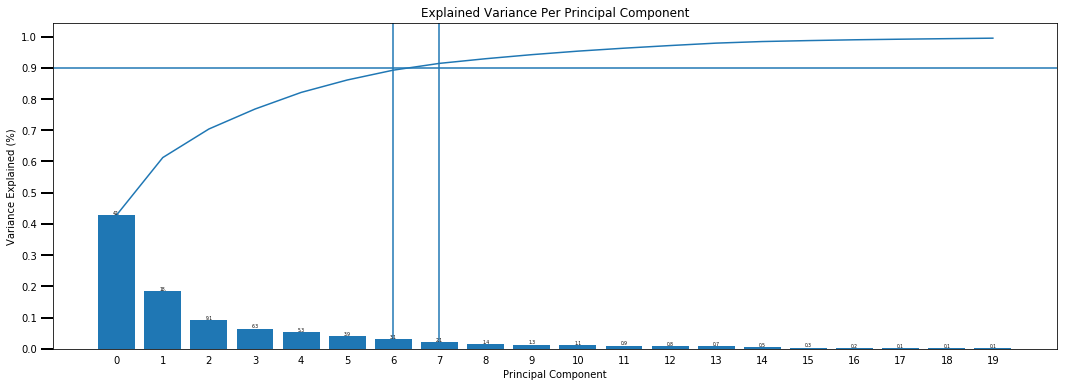

In [13]:
scree_plot(df, 20)

So we know we want 7 principal axes to account for $90\%$ of the variance

In [0]:
D = into_PCA(df, 7)

labelsPCA7 = k_cluster(D, 2)
labelsPCA7;

## Check your work: 

- Compare your PC1, PC2 clustering scatterplot to the clustering scatterplots you made on the raw data
- Calculate accuracy scores for both the PC1,PC2 Principal component clustering and the 90% of explained variance clustering.

How do your accuracy scores when preprocessing the data with PCA compare to the accuracy when clustering on the raw data?

In [0]:
def test_accuracy(truth, labels, old_accuracy): 
  differences = (truth - labels).value_counts()
  right = differences[0]
  wrong = differences[1] + differences[-1]

  acc = right / (wrong + right)
  
  labels_copy = labels.copy()
  if acc < old_accuracy:
    for i in range(len(labels_copy)):
      if labels_copy[i] == 0:
        labels_copy[i] = 1
      elif labels_copy[i] == 1:
        labels_copy[i] = 0
  
  differences = (truth - labels_copy).value_counts()
  right = differences[0]
  wrong = differences[1] + differences[-1]

  acc = right / (wrong + right)
  
  print('Correct Labels: ', right, '\n', 
      'Incorrect Labels: ', wrong, '\n',
      'Accuracy: ', acc)
  
  return 

In [16]:
test_accuracy(true['diagnosis'], labels, accuracy)

Correct Labels:  213 
 Incorrect Labels:  356 
 Accuracy:  0.37434094903339193


In [17]:
test_accuracy(true['diagnosis'], labelsPCA, accuracy)

Correct Labels:  516 
 Incorrect Labels:  53 
 Accuracy:  0.9068541300527241


We've got over $90\%$ accuracy with 2 PC's, not bad.

In [18]:
test_accuracy(true['diagnosis'], labelsPCA7, accuracy)

Correct Labels:  518 
 Incorrect Labels:  51 
 Accuracy:  0.9103690685413005


Accounting for $90\%$ of the variance only got us a little bit more accuracy. Definitely some "law of diminishing returns" going on here.

# Stretch Goals:

- Study for the Sprint Challenge
- Work on your Data Storytelling Project
- Practice your two-minute presentation for your Data Storytelling Project